# Predicting Categories with Logistic Regression

## - Implementing logistic regression using scikit-learn

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# Reading in the dataset

df = pd.read_csv("fraud_prediction.csv")

## - Splitting the data into training and test sets

In [3]:
from sklearn.model_selection import train_test_split


#Creating the features and target


features = df.drop("isFraud",axis=1).values
target = df["isFraud"].values


#Creating the training and testing data

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3,random_state=42,stratify=target) 

In [4]:
# Implementing a base logistic regression classifier and evaluate its accuracy score

from sklearn import linear_model

# Initializing an logistic regression object

logistic_regression = linear_model.LogisticRegression()

#Fitting the model to the training and test sets


logistic_regression.fit(X_train,y_train)

LogisticRegression()

In [5]:
# Obtaining the accuracy score of the logistic regression model 

logistic_regression.score(X_test,y_test)

0.5893697083725306

In [6]:
# The above score is only slightly better than an algorithm that randomly guesses the output

# Fine-tuning the hyperparameters

In [7]:
# Building the model with L1 penality

logistic_regression = linear_model.LogisticRegression(penalty="l1",solver='liblinear')

#Using GridSearchCV to search for the best parameter

grid = GridSearchCV(logistic_regression, {'C':[0.0001, 0.001, 0.01, 0.1, 10]});
grid.fit(X_train, y_train);

# Print out the best parameter

print("The most optimal inverse regularization strength is:",grid.best_params_);

The most optimal inverse regularization strength is: {'C': 10}


In [8]:
# Initializing an logistic regression object

logistic_regression = linear_model.LogisticRegression(C = 10,penalty = "l1",solver='liblinear')

#Fitting the model to the training and test sets

logistic_regression.fit(X_train,y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [9]:
# Accuracy score of the logistic regression model

logistic_regression.score(X_test,y_test)

0.9968250235183443

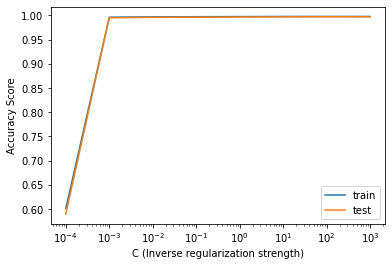

In [10]:
#Checking if the GridSearchCV is giving the accurate results by plotting the accuracy scores along the y-axis for different values
#of the inverse regularization strengths along the x-axis.

train_errors = []
test_errors = []

C_list = [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]

# Evaluate the training and test classification errors for each value of C

for value in C_list:
    
    # Create LogisticRegression object and fit
    logistic_regression = linear_model.LogisticRegression(C= value, penalty = 'l1',solver='liblinear')
    logistic_regression.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errors.append(logistic_regression.score(X_train, y_train) )
    test_errors.append(logistic_regression.score(X_test, y_test))
    
# Plot results
plt.semilogx(C_list, train_errors, C_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Accuracy Score')
plt.xlabel('C (Inverse regularization strength)')
plt.show()

## - Scaling the data

In [11]:
# Using the same scaling technique from the previous ch

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


#Setting up the scaling pipeline


pipeline_order = [("scaler",StandardScaler()),("logistic_reg",linear_model.LogisticRegression(C=10,penalty="l1",solver='liblinear'))]

pipeline = Pipeline(pipeline_order)


#Fitting the classifier to the scaled dataset

logistic_regression_scaled = pipeline.fit(X_train,y_train)


#Extracting the score


logistic_regression_scaled.score(X_test, y_test)

0.9972953904045155

## - Interpreting the logistic regression model

In [12]:
#Printing out the coefficients of each variable

print(logistic_regression.coef_)

[[ 3.95051639e-05  2.28893731e-01 -5.19537036e-06  2.44319899e-05
  -3.51348834e-05 -1.51252142e-06 -6.37685635e-08 -1.16457561e+01
  -9.29918255e+00 -1.70149751e+01 -1.19729540e+01 -9.28316920e+00]]


In [13]:
# Printing out the intercept of the model

print(logistic_regression.intercept_)

[3.2344168]
